# Capstone Project - DermaSeer

At this stage, the process of loading, splitting, and pre-processing the dataset is carried out. Please note that after loading the dataset, the process of splitting the dataset will be carried out into 65% training data, 25% validation data, and 10% testing data. Then, data pre-processing will be carried out, including resizing, augmentation, and normalization for training and validation data. No pre-processing is carried out on testing data.

#  1. Import Library

In [ ]:
import os  # interacting with the operating system (file and directory manipulation)
from PIL import Image  # image processing (open, manipulate, and save images)
from collections import Counter  # count occurrences of elements in an iterable
from collections import defaultdict  # dictionary with default values for missing keys
import numpy as np  # numerical operations and array handling
import matplotlib.pyplot as plt  # data visualization (plotting graphs and charts)
import random  # random number generation and sampling
import shutil  # high-level file operations (copying, moving, deleting files)
from collections import defaultdict  # dictionary with default values for missing keys
from torchvision import transforms  # image transformations (for machine learning and data augmentation)

# 2. Load Dataset

The dataset is obtained from kaggle with the link: https://www.kaggle.com/datasets/dinartas/skin90?resource=download. With a focus on acne detection, data was taken from 5 types of acne, including Nodules, Fulminans, Papules, Fungal, Pustules.
With information on the type of acne:
- P: Postula: Pimples filled with pus that appear on the surface of the skin, often with white or yellow heads.
- Pa : Papula: Small red pimples that appear on the skin without pus.
- F: Fulminans: Acne that develops into a larger and more severe purulent infection.
- N: Nodules: Acne in the form of hard lumps that form under the surface of the skin.
- Fu : Fungal: Large, inflamed pimples that occur due to bacterial infections in hair follicles.

In [ ]:
# path to the folder containing images
folder_path = 'dataset-acne'

# initialize lists to store images and filenames
data = []
filenames = []

# loop to read each image file in the folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.jpg', '.JPG', '.png', '.jfif')):  # filter for image files
        file_path = os.path.join(folder_path, filename)

        # open the image and append it to the data list
        img = Image.open(file_path)
        data.append(img)

        # append the filename to the filenames list
        filenames.append(filename)

print('Number Of Images Loaded:', len(data))

Number Of Images Loaded: 350


In [ ]:
# display all filename
for file in filenames:
    print(file)

f43.JPG
f57.JPG
pa34.jpg
pa20.JPG
fu63.JPG
p12.jpg
n62.JPG
n63.JPG
fu62.JPG
pa21.JPG
pa35.jpg
f56.JPG
f42.JPG
f54.JPG
f40.JPG
f68.JPG
pa23.JPG
pa37.jpg
fu48.JPG
fu60.JPG
p11.jpg
p39.JPG
p14.jfif
n49.JPG
n61.JPG
n60.JPG
n48.JPG
p38.JPG
p10.jpg
fu61.JPG
fu49.JPG
pa36.JPG
pa22.JPG
f69.JPG
f41.JPG
f55.JPG
f51.JPG
f45.JPG
n9.JPG
pa26.JPG
pa32.JPG
fu65.JPG
fu59.JPG
p28.jpg
n64.JPG
n70.JPG
n58.JPG
n59.JPG
n65.JPG
p15.JPG
p29.jpg
fu58.JPG
fu70.JPG
fu64.JPG
pa33.JPG
pa27.JPG
n8.JPG
f44.JPG
f50.JPG
f46.JPG
f52.JPG
pa19.JPG
fu8.JPG
pa31.JPG
pa25.jpg
fu66.JPG
p17.JPG
n67.JPG
n66.JPG
p16.JPG
fu67.JPG
pa24.JPG
pa30.JPG
fu9.JPG
pa18.JPG
f53.JPG
f47.JPG
f20.JPG
f34.JPG
f7.JPG
pa57.JPG
pa43.jpg
fu28.JPG
p45.jfif
fu14.JPG
p65.JPG
p59.JPG
pa6.JPG
n29.JPG
n15.JPG
n14.JPG
n28.JPG
pa7.JPG
p58.JPG
p70.JPG
p64.JPG
fu15.JPG
fu29.JPG
pa42.JPG
pa56.JPG
f6.JPG
f35.JPG
f21.JPG
f37.JPG
f23.JPG
f4.JPG
pa40.JPG
pa54.JPG
pa68.JPG
fu17.JPG
p66.JPG
pa5.jpg
n16.JPG
n17.JPG
pa4.JPG
p67.JPG
fu16.JPG
pa69.jpg
pa55.JPG
pa41.

# 3. Displaying and Exploring the Initial DatasetDisplay and Exploring the Dataset

At this stage, the initial dataset is displayed either as a whole or according to the type of each acne. Then, an exploration of the initial dataset is carried out to determine the characteristics of the dataset, including the appearance of the distribution of the number of images for each type of acne to ensure the balance of the dataset, and histogram plots for the distribution of image resolution.

**A. Display Images Dataset**

Displays 10 dataset images from the total dataset

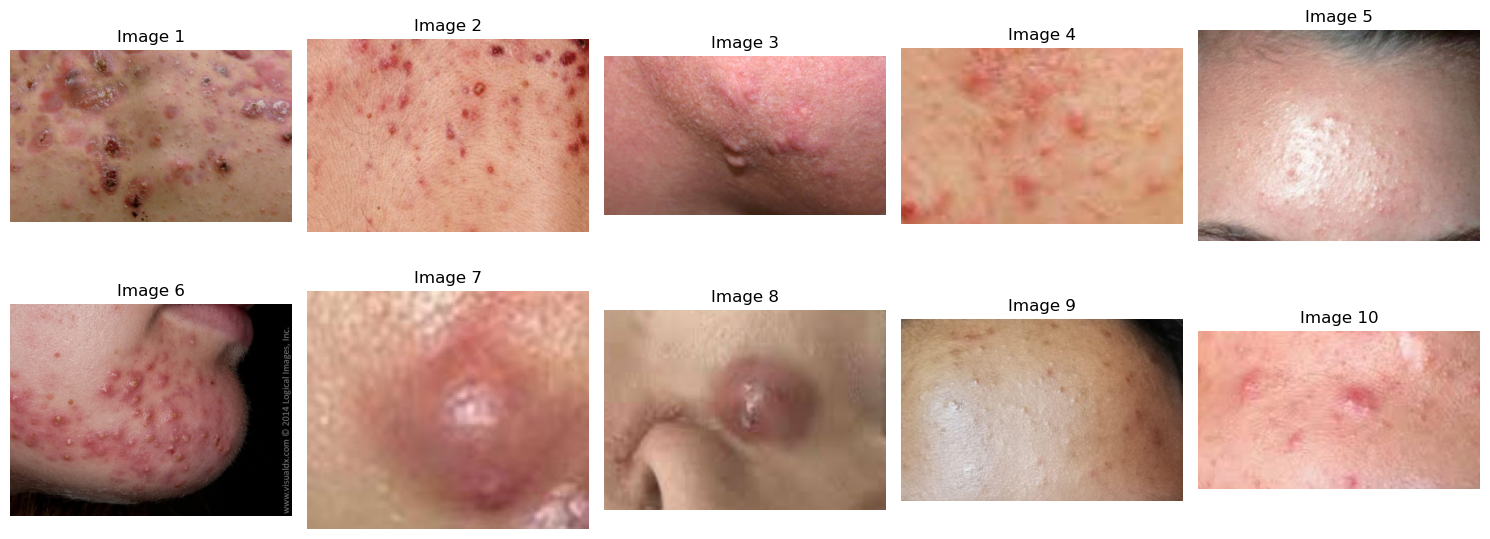

In [ ]:
# display the top 10 images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flatten()[:10]):
    # open the image file
    img_path = os.path.join(folder_path, filenames[i])
    img = Image.open(img_path)

    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f'Image {i+1}')

plt.tight_layout()
plt.show()

**B. Display 5 Dataset Images for Each Label**

Displays 5 images of each label or type of acne from the dataset with the aim of knowing the differences between one type and another visually.

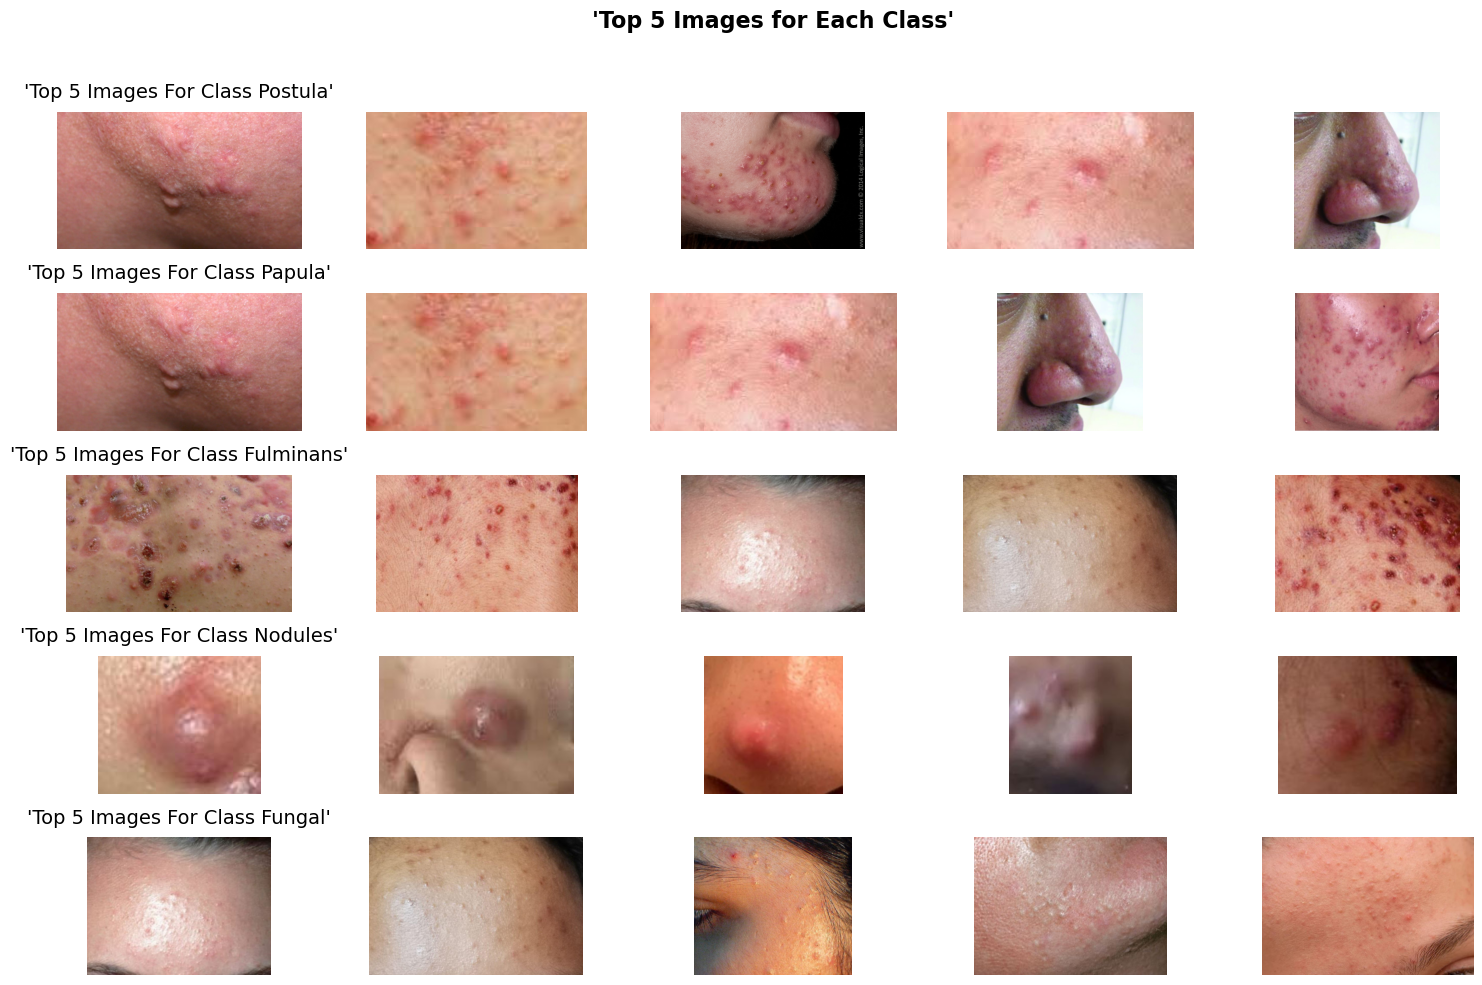

In [ ]:
# define the classes and their prefixes
classes = {'p': 'Postula', 'pa': 'Papula', 'f': 'Fulminans', 'n': 'Nodules', 'fu': 'Fungal'}

# create a plot
fig, axes = plt.subplots(len(classes), 5, figsize=(15, 10))
fig.suptitle("'Top 5 Images for Each Class'", fontsize=16, fontweight='bold')

# loop through each class and display the images
for row, (key, class_name) in enumerate(classes.items()):
    # filter filenames for the current class
    class_files = [f for f in filenames if f.startswith(key)]

    # add title for the class at the top of the row (without bold)
    axes[row, 0].set_title(f"'Top 5 Images For Class {class_name}'", fontsize=14, pad=10)

    for col in range(5):
        if col < len(class_files):  # ensure there are enough images
            # get the corresponding image from the data list
            img = data[filenames.index(class_files[col])]
            ax = axes[row, col]
            ax.imshow(img)
            ax.axis('off')
        else:
            # if not enough images, leave the subplot empty
            axes[row, col].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**C. Display Distibution Number Of Each Type Of Acne**

Displaying the distribution of the number of each type of acne to ensure data balance.

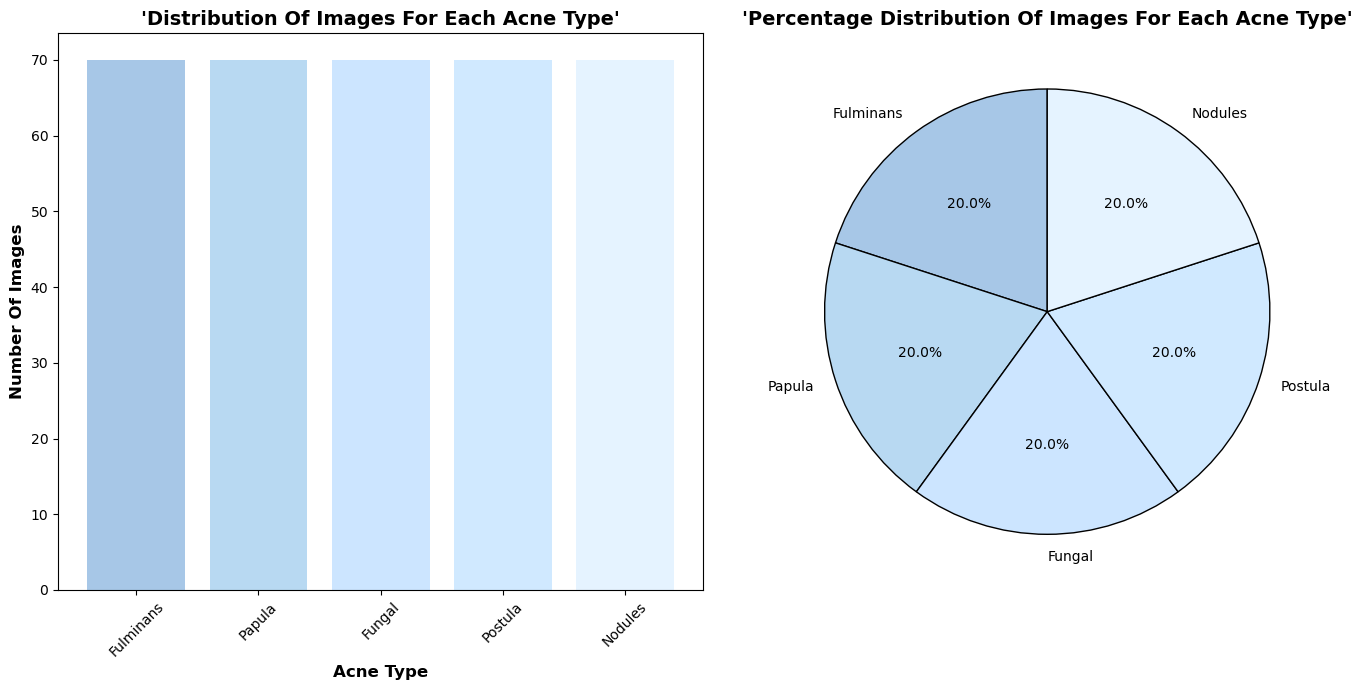

In [ ]:
# define classes mapping
classes = {'p': 'Postula', 'pa': 'Papula', 'f': 'Fulminans', 'n': 'Nodules', 'fu': 'Fungal'}

# folder containing the dataset
dataset_folder = 'dataset-acne'

# initialize defaultdict to store images by class
class_dict = defaultdict(list)

# loop over files in dataset folder
for image in os.listdir(dataset_folder):
    if image.endswith(('.jpg', '.JPG', '.png', '.jfif')):  # only image files
        label = image.split('_')[-1][:2] if not image.split('_')[-1][1].isdigit() else image.split('_')[-1][0]
        class_dict[label].append(image)

# count images per class
class_counts = {classes[label]: len(images) for label, images in class_dict.items()}

# define light blue colors
light_blue_colors = ['#a7c7e7', '#b8d9f2', '#cce5ff', '#d0e9ff', '#e5f3ff']

# set up plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# bar chart
ax1.bar(class_counts.keys(), class_counts.values(), color=light_blue_colors)
ax1.set_xlabel('Acne Type', fontsize=12, fontweight='bold', color='black')
ax1.set_ylabel('Number Of Images', fontsize=12, fontweight='bold', color='black')
ax1.set_title("'Distribution Of Images For Each Acne Type'", fontsize=14, fontweight='bold', color='black')
ax1.tick_params(axis='x', rotation=45)
ax1.set_axisbelow(True)

# pie chart
ax2.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=light_blue_colors, startangle=90, wedgeprops={'edgecolor': 'black'})
ax2.set_title("'Percentage Distribution Of Images For Each Acne Type'", fontsize=14, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

**D. Image Resolution Distibution**

Displays the image resolution distribution to determine whether the image requires normalization pre-processing or not.

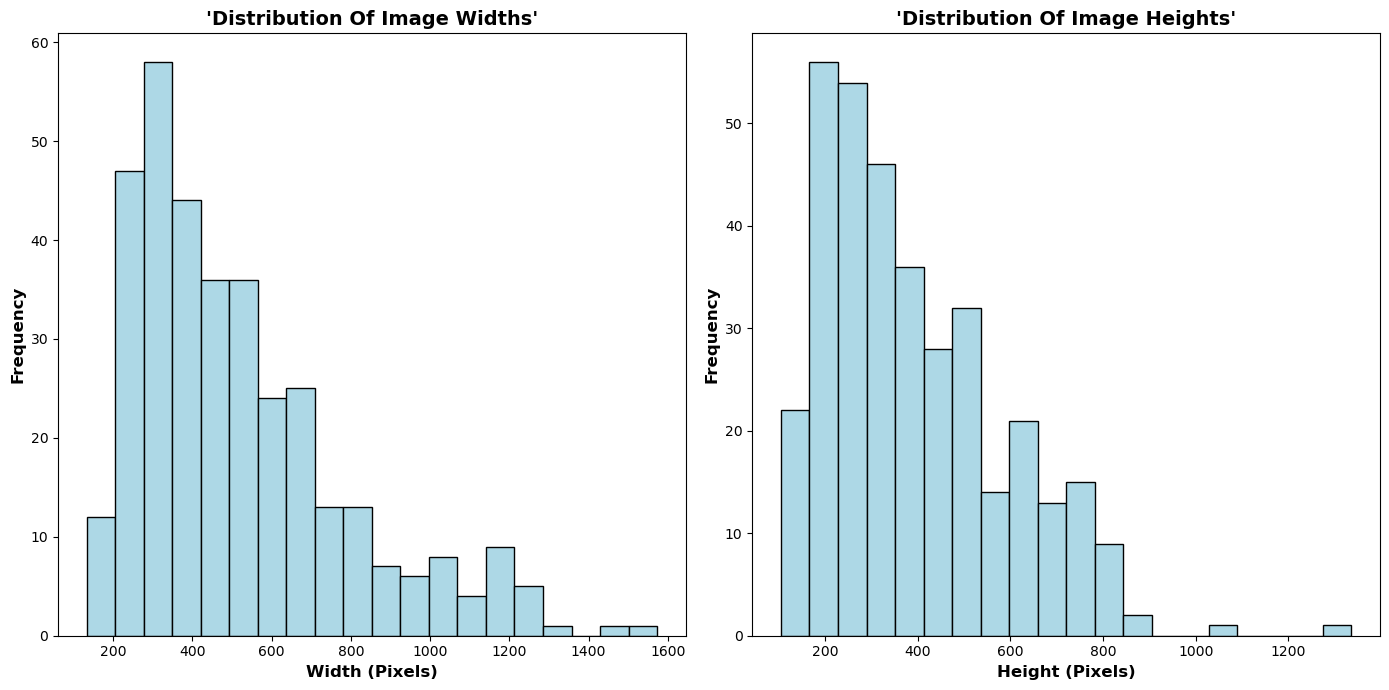

In [ ]:
# folder containing the dataset 'dataset-acne' save in dataset_folder
widths = []
heights = []

# loop over all files in the dataset folder
for image_name in os.listdir(dataset_folder):
    if image_name.endswith(('.jpg', '.JPG', '.png', '.jfif')):  # only process image files
        # open the image and get its dimensions
        with Image.open(os.path.join(dataset_folder, image_name)) as img:
            width, height = img.size  # get width and height of the image
            widths.append(width)
            heights.append(height)

# plotting histograms for the image resolutions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# histogram for image widths
ax1.hist(widths, bins=20, color='lightblue', edgecolor='black')
ax1.set_xlabel('Width (Pixels)', fontsize=12, fontweight='bold', color='black')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold', color='black')
ax1.set_title("'Distribution Of Image Widths'", fontsize=14, fontweight='bold', color='black')

# histogram for image heights
ax2.hist(heights, bins=20, color='lightblue', edgecolor='black')
ax2.set_xlabel('Height (Pixels)', fontsize=12, fontweight='bold', color='black')
ax2.set_ylabel('Frequency', fontsize=12, fontweight='bold', color='black')
ax2.set_title("'Distribution Of Image Heights'", fontsize=14, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

# 4. Splitting Dataset

Splitting the dataset from each class/type of acne was done. With a proportion of 65% training data, 25% validation data, and 10% testing data.

In [ ]:
# dataset split percentages
train_percentage = 0.65  # train data 65%
val_percentage = 0.25    # validation data 25%
test_percentage = 0.10   # test data 10%

# directories for each dataset
directories = {
    'train': 'train',
    'validation': 'validation',
    'test': 'test'}

# folder where the original images are stored (dataset-acne)
dataset_folder = 'dataset-acne'

# class dictionary with descriptive names
classes = {'p': 'Postula', 'pa': 'Papula', 'f': 'Fulminans', 'n': 'Nodules', 'fu': 'Fungal'}

# create directories
for folder in directories.values():
    os.makedirs(folder, exist_ok=True)

# organize images by class (label taken from the text after the last underscore)
class_dict = defaultdict(list)
for image in os.listdir(dataset_folder):
    if image.endswith(('.jpg', '.JPG', '.png', '.jfif')):  # only image files are processed
        # get the text after the last underscore
        label_part = image.split('_')[-1]

        # check if the second character is a digit; if so, only take the first character
        if len(label_part) > 1 and label_part[1].isdigit():
            label = label_part[0]  # only take the first character
        else:
            label = label_part[:2]  # take the first two characters if both are letters

        class_dict[label].append(image)

# split the images by class and count the number for each category
split_counts = {
    'train': defaultdict(int),
    'validation': defaultdict(int),
    'test': defaultdict(int)
}

# function to copy images to the appropriate folder
def copy_images(image_list, source_folder, destination_folder, class_name):
    # create sub-folder for the class name
    class_folder = os.path.join(destination_folder, class_name)
    os.makedirs(class_folder, exist_ok=True)

    # copy images to the class folder
    for image in image_list:
        shutil.copy(os.path.join(source_folder, image), os.path.join(class_folder, image))

# process the split and copy the images
for label, images in class_dict.items():
    random.shuffle(images)

    total_images = len(images)
    train_count = int(train_percentage * total_images)
    val_count = int(val_percentage * total_images)
    test_count = total_images - train_count - val_count

    # split the images for each dataset
    splits = {
        'train': images[:train_count],
        'validation': images[train_count:train_count + val_count],
        'test': images[train_count + val_count:]
    }

    # copy the images to the respective folders and count the numbers
    for split, image_list in splits.items():
        copy_images(image_list, dataset_folder, directories[split], classes[label])
        split_counts[split][classes[label]] = len(image_list)

# output the results of the dataset split
print(f'Dataset Split Completed')
for split in ['train', 'validation', 'test']:
    print(f'\n{split.capitalize()}:')
    print(f'Total Number of Images: {sum(split_counts[split].values())}')
    for class_name, count in split_counts[split].items():
        print(f'{class_name}: {count} ({(count / sum(split_counts[split].values())) * 100:.2f}%)')

Dataset Split Completed

Train:
Total Number of Images: 225
Fulminans: 45 (20.00%)
Papula: 45 (20.00%)
Fungal: 45 (20.00%)
Postula: 45 (20.00%)
Nodules: 45 (20.00%)

Validation:
Total Number of Images: 85
Fulminans: 17 (20.00%)
Papula: 17 (20.00%)
Fungal: 17 (20.00%)
Postula: 17 (20.00%)
Nodules: 17 (20.00%)

Test:
Total Number of Images: 40
Fulminans: 8 (20.00%)
Papula: 8 (20.00%)
Fungal: 8 (20.00%)
Postula: 8 (20.00%)
Nodules: 8 (20.00%)


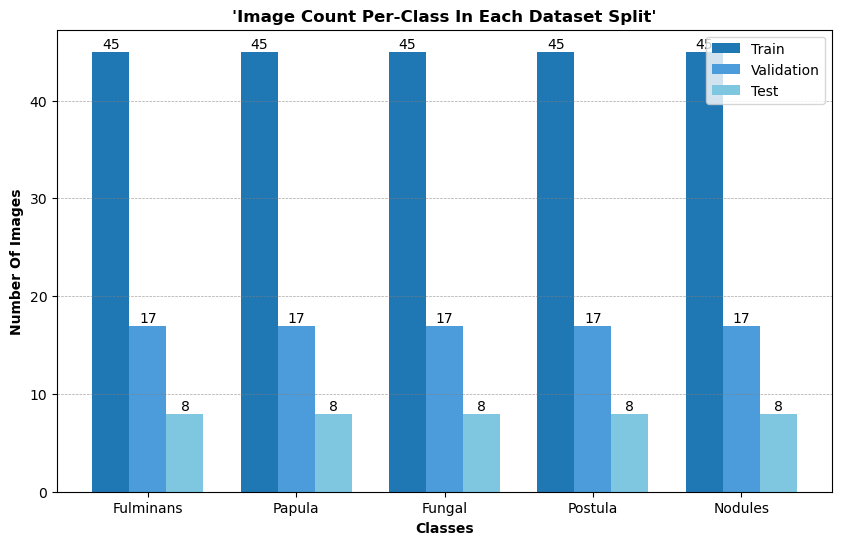

In [ ]:
# prepare data for visualization
splits = ['train', 'validation', 'test']
classes = list(split_counts['train'].keys())
split_data = {split: [split_counts[split][cls] for cls in classes] for split in splits}

# plot the data
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.25  # width of each bar
x = range(len(classes))

# define the color palette for blue tones
blue_palette = ['#1f77b4', '#4c9cdb', '#7fc7e1']  # different shades of blue

# plot each split as a separate bar group and add text on top of each bar
for i, split in enumerate(splits):
    bars = ax.bar([pos + i * width for pos in x], split_data[split], width, label=split.capitalize(), color=blue_palette[i])
    # add value labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom', color='black')

# add a grid background
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

# configure the plot
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(classes)
ax.set_xlabel('Classes', fontweight='bold')
ax.set_ylabel('Number Of Images', fontweight='bold')
ax.set_title("'Image Count Per-Class In Each Dataset Split'", fontweight='bold')
ax.legend()

plt.show()

# 4. Pre-Processing Dataset

After carrying out the initial data exploration stage, it was discovered that a dataset pre-processing stage was required with image resizing, augmentation, and normalization stages for training data and validation data only.

**A. Resize Images**

This code resizes images from "train" and "validation" folders to 224x224 pixels, saves them in `resize-train` and `resize-validation` subfolders, and creates the directories if they don't exist. It processes only image files, handles errors, and tracks the paths of resized images.

In [ ]:
# setup resize images
resize_shape = (224, 224)  # the target size for resizing images

# define the main folder for resized images
main_resize_folder = 'resize-images'  # main folder for resized images

# define subfolders for train and validation datasets
resize_train_folder = os.path.join(main_resize_folder, 'resize-train')  # output folder for resized training images
resize_validation_folder = os.path.join(main_resize_folder, 'resize-validation')  # output folder for resized validation images

# create the main resize folder and subfolders if they don't exist
os.makedirs(resize_train_folder, exist_ok=True)
os.makedirs(resize_validation_folder, exist_ok=True)

# initialize list to store resized image paths
resized_images = []

# define the source folders for train and validation datasets
folders = ['train', 'validation']
base_path = '.'  # current directory

# loop through each folder (train and validation)
for folder in folders:
    folder_path = os.path.join(base_path, folder)  # get full path of train/validation
    if os.path.exists(folder_path):
        print(f'Processing Folder: {folder_path}')

        # loop through the directory tree using os.walk
        for root, dirs, files in os.walk(folder_path):
            print(f'Processing Directory: {root}')
            # loop through files in each subdirectory
            for filename in files:
                # check if the file is an image
                name, ext = os.path.splitext(filename)
                if ext.lower() in ['.jpg', '.jpeg', '.png', '.jfif']:  # check for image extensions
                    file_path = os.path.join(root, filename)  # full path of the image
                    try:
                        # open the image and resize it
                        img = Image.open(file_path)
                        img = img.resize(resize_shape)

                        # construct the path to save the resized image
                        if folder == 'train':
                            resized_image_path = os.path.join(resize_train_folder, f'resized_{filename}')
                        else:  # folder == 'validation'
                            resized_image_path = os.path.join(resize_validation_folder, f'resized_{filename}')

                        # save the resized image
                        img.save(resized_image_path)
                        resized_images.append(resized_image_path)
                        print(f'Saved Resized Image To: {resized_image_path}')
                    except Exception as e:
                        print(f'failed to process {file_path}: {e}')
                else:
                    print(f'Skipping Non-Image File: {filename}')
    else:
        print(f'Folder {folder} Not Found At Path: {folder_path}')

# print out the resized images
print('Resized Images:', resized_images)

Processing Folder: ./train
Processing Directory: ./train
Processing Directory: ./train/Postula
Saved Resized Image To: resize-images/resize-train/resized_p12.jpg
Saved Resized Image To: resize-images/resize-train/resized_p39.JPG
Saved Resized Image To: resize-images/resize-train/resized_p38.JPG
Saved Resized Image To: resize-images/resize-train/resized_p10.jpg
Saved Resized Image To: resize-images/resize-train/resized_p15.JPG
Saved Resized Image To: resize-images/resize-train/resized_p29.jpg
Saved Resized Image To: resize-images/resize-train/resized_p16.JPG
Saved Resized Image To: resize-images/resize-train/resized_p45.jfif
Saved Resized Image To: resize-images/resize-train/resized_p65.JPG
Saved Resized Image To: resize-images/resize-train/resized_p59.JPG
Saved Resized Image To: resize-images/resize-train/resized_p58.JPG
Saved Resized Image To: resize-images/resize-train/resized_p64.JPG
Saved Resized Image To: resize-images/resize-train/resized_p66.JPG
Saved Resized Image To: resize-im

Saved Resized Image To: resize-images/resize-train/resized_n56.JPG
Saved Resized Image To: resize-images/resize-train/resized_n7.JPG
Saved Resized Image To: resize-images/resize-train/resized_n68.JPG
Saved Resized Image To: resize-images/resize-train/resized_n40.JPG
Saved Resized Image To: resize-images/resize-train/resized_n54.JPG
Saved Resized Image To: resize-images/resize-train/resized_n55.JPG
Saved Resized Image To: resize-images/resize-train/resized_n4.JPG
Saved Resized Image To: resize-images/resize-train/resized_n51.JPG
Saved Resized Image To: resize-images/resize-train/resized_n44.JPG
Saved Resized Image To: resize-images/resize-train/resized_n1.JPG
Saved Resized Image To: resize-images/resize-train/resized_n53.JPG
Saved Resized Image To: resize-images/resize-train/resized_n2.JPG
Processing Directory: ./train/Fungal
Saved Resized Image To: resize-images/resize-train/resized_fu63.JPG
Saved Resized Image To: resize-images/resize-train/resized_fu62.JPG
Saved Resized Image To: res

Saved Resized Image To: resize-images/resize-validation/resized_n45.JPG
Saved Resized Image To: resize-images/resize-validation/resized_n50.JPG
Saved Resized Image To: resize-images/resize-validation/resized_n3.JPG
Saved Resized Image To: resize-images/resize-validation/resized_n52.JPG
Saved Resized Image To: resize-images/resize-validation/resized_n46.JPG
Processing Directory: ./validation/Fungal
Saved Resized Image To: resize-images/resize-validation/resized_fu59.JPG
Saved Resized Image To: resize-images/resize-validation/resized_fu66.JPG
Saved Resized Image To: resize-images/resize-validation/resized_fu15.JPG
Saved Resized Image To: resize-images/resize-validation/resized_fu13.JPG
Saved Resized Image To: resize-images/resize-validation/resized_fu11.JPG
Saved Resized Image To: resize-images/resize-validation/resized_fu38.JPG
Saved Resized Image To: resize-images/resize-validation/resized_fu37.JPG
Saved Resized Image To: resize-images/resize-validation/resized_fu32.JPG
Saved Resized I

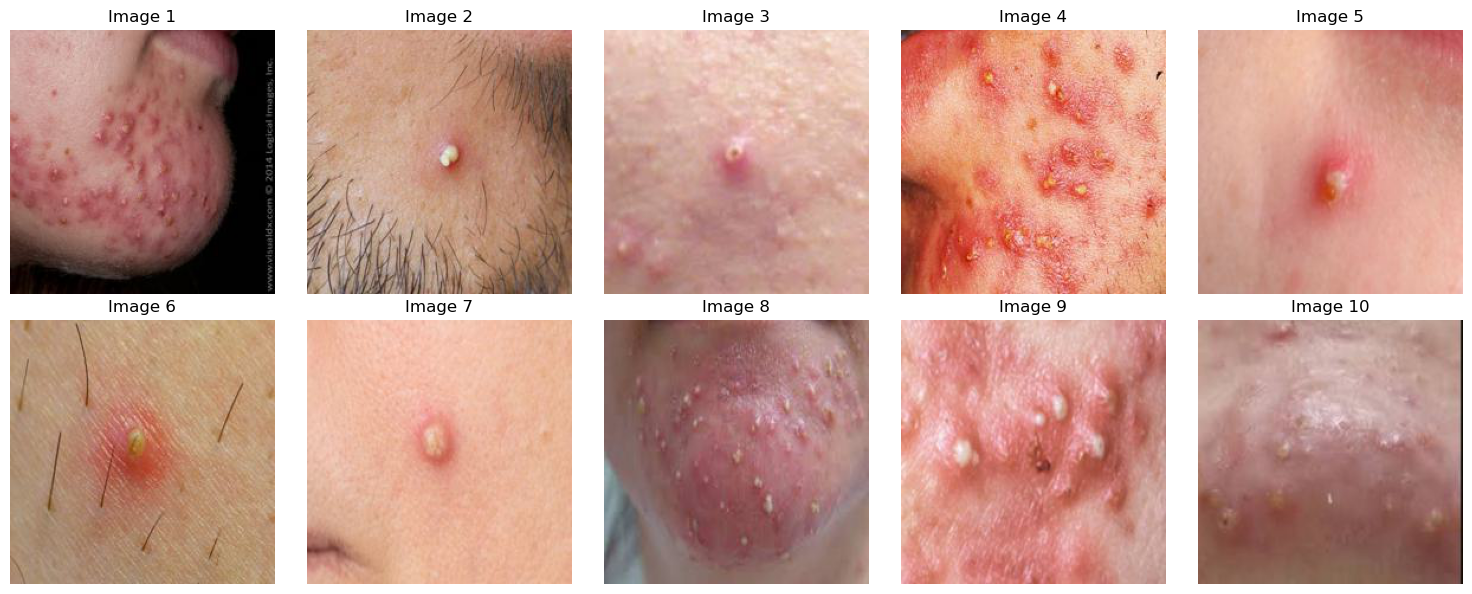

In [ ]:
# display the first 10 resized images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flatten()[:10]):
    ax.imshow(Image.open(resized_images[i]))
    ax.axis('off')
    ax.set_title(f'Image {i+1}')

plt.tight_layout()
plt.show()

**B. Augmentation Images**

This code applies data augmentation (e.g., flips, rotation, cropping, color jitter) to images in the "resize-images" folder and saves five augmented versions per image in the "augmentation-images" folder, under `augmentation-train` and `augmentation-validation`. It ensures necessary directories exist and logs the augmentation progress.

In [ ]:
# folder paths
resize_folder = 'resize-images'  # main folder for resized images
augmentation_folder = 'augmentation-images'  # main folder for augmented images

# create the main augmentation folder if it doesn't exist
os.makedirs(augmentation_folder, exist_ok=True)

# create the subfolders for train and validation if they don't exist
augmentation_train_folder = os.path.join(augmentation_folder, 'augmentation-train')
augmentation_validation_folder = os.path.join(augmentation_folder, 'augmentation-validation')

os.makedirs(augmentation_train_folder, exist_ok=True)
os.makedirs(augmentation_validation_folder, exist_ok=True)

# define the augmentation pipeline
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # augment: random horizontal flip
    transforms.RandomVerticalFlip(),    # augment: random vertical flip
    transforms.RandomRotation(30),      # augment: random rotation up to 30 degrees
    transforms.RandomResizedCrop(128),  # augment: random crop and resize to 128x128
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # augment: random color jitter
    transforms.ToTensor(),              # convert image to tensor
])

# process all images in the 'resize-images' folder
for subfolder in ['resize-train', 'resize-validation']:
    folder_path = os.path.join(resize_folder, subfolder)  # get full path of resize-train or resize-validation
    if os.path.exists(folder_path):
        print(f"Processing Folder: {folder_path}")

        # loop through files in each subfolder
        for filename in os.listdir(folder_path):
            if filename.endswith(('.jpg', '.JPG', '.png', '.jfif')):
                img_path = os.path.join(folder_path, filename)

                # open the image
                img = Image.open(img_path)

                # generate and save 5 augmented images for each image
                augmented_images = []
                for i in range(5):
                    augmented_img = transform(img)

                    # convert back to PIL image for saving
                    augmented_img_pil = transforms.ToPILImage()(augmented_img)

                    # define the path to save the augmented image
                    if subfolder == 'resize-train':
                        augmented_image_path = os.path.join(augmentation_train_folder, f"Augmented_{i}_{filename}")
                    else:  # subfolder == 'resize-validation'
                        augmented_image_path = os.path.join(augmentation_validation_folder, f"Augmented_{i}_{filename}")

                    # save the augmented image
                    augmented_img_pil.save(augmented_image_path)

                    # add to the list of augmented images
                    augmented_images.append(augmented_img_pil)

                print(f'Augmentation For {filename} Completed. Total {len(augmented_images)} Images Saved.')

print('Augmentation For All Images Completed.')

Processing Folder: resize-images/resize-train
Augmentation For resized_f14.JPG Completed. Total 5 Images Saved.
Augmentation For resized_f28.JPG Completed. Total 5 Images Saved.
Augmentation For resized_pa65.JPG Completed. Total 5 Images Saved.
Augmentation For resized_pa59.JPG Completed. Total 5 Images Saved.
Augmentation For resized_n35.JPG Completed. Total 5 Images Saved.
Augmentation For resized_p44.JPG Completed. Total 5 Images Saved.
Augmentation For resized_p50.jpg Completed. Total 5 Images Saved.
Augmentation For resized_n34.JPG Completed. Total 5 Images Saved.
Augmentation For resized_pa64.JPG Completed. Total 5 Images Saved.
Augmentation For resized_pa70.JPG Completed. Total 5 Images Saved.
Augmentation For resized_fu27.JPG Completed. Total 5 Images Saved.
Augmentation For resized_fu33.JPG Completed. Total 5 Images Saved.
Augmentation For resized_fu19.JPG Completed. Total 5 Images Saved.
Augmentation For resized_fu25.JPG Completed. Total 5 Images Saved.
Augmentation For resiz

Augmentation For resized_f55.JPG Completed. Total 5 Images Saved.
Augmentation For resized_n48.JPG Completed. Total 5 Images Saved.
Augmentation For resized_pa24.JPG Completed. Total 5 Images Saved.
Augmentation For resized_pa30.JPG Completed. Total 5 Images Saved.
Augmentation For resized_n60.JPG Completed. Total 5 Images Saved.
Augmentation For resized_p10.jpg Completed. Total 5 Images Saved.
Augmentation For resized_p38.JPG Completed. Total 5 Images Saved.
Augmentation For resized_p39.JPG Completed. Total 5 Images Saved.
Augmentation For resized_pa31.JPG Completed. Total 5 Images Saved.
Augmentation For resized_pa25.jpg Completed. Total 5 Images Saved.
Augmentation For resized_n49.JPG Completed. Total 5 Images Saved.
Augmentation For resized_f68.JPG Completed. Total 5 Images Saved.
Augmentation For resized_f54.JPG Completed. Total 5 Images Saved.
Augmentation For resized_f40.JPG Completed. Total 5 Images Saved.
Augmentation For resized_p2.JPG Completed. Total 5 Images Saved.
Augment

Augmentation For resized_n61.JPG Completed. Total 5 Images Saved.
Augmentation For resized_pa19.JPG Completed. Total 5 Images Saved.
Augmentation For resized_fu66.JPG Completed. Total 5 Images Saved.
Augmentation For resized_f50.JPG Completed. Total 5 Images Saved.
Augmentation For resized_n59.JPG Completed. Total 5 Images Saved.
Augmentation For resized_pa20.JPG Completed. Total 5 Images Saved.
Augmentation For resized_f47.JPG Completed. Total 5 Images Saved.
Augmentation For resized_p17.JPG Completed. Total 5 Images Saved.
Augmentation For resized_n67.JPG Completed. Total 5 Images Saved.
Augmentation For resized_f46.JPG Completed. Total 5 Images Saved.
Augmentation For resized_p4.jpg Completed. Total 5 Images Saved.
Augmentation For resized_p14.jfif Completed. Total 5 Images Saved.
Augmentation For resized_fu13.JPG Completed. Total 5 Images Saved.
Augmentation For resized_f21.JPG Completed. Total 5 Images Saved.
Augmentation For resized_pa50.jpg Completed. Total 5 Images Saved.
Augme

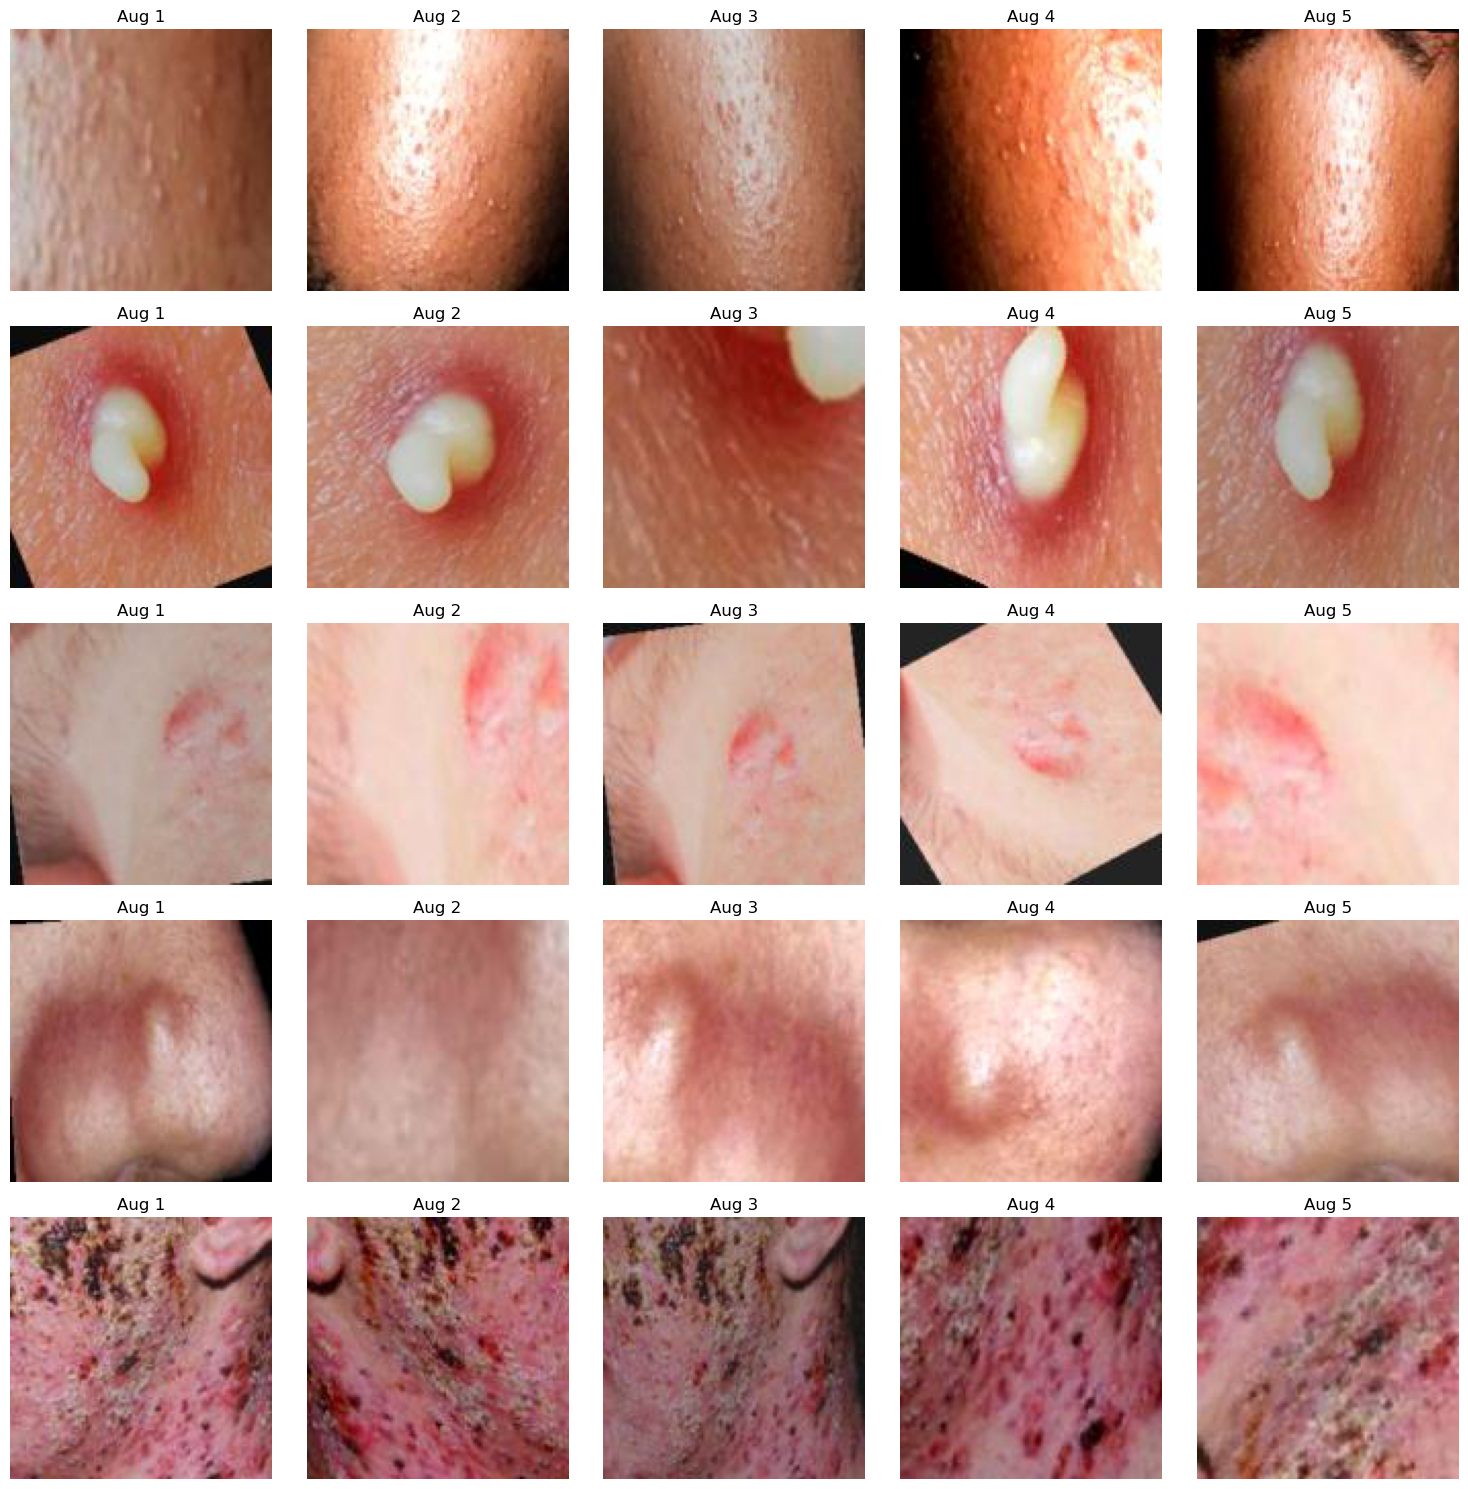

In [ ]:
# define the file names for which to show augmentations
image_files = ['resized_fu1', 'resized_p25', 'resized_pa2', 'resized_n1', 'resized_f1']

# define the folder where augmented images are saved
augmentation_folder = 'augmentation-images/augmentation-train'  # assuming you want to display from training set

# prepare subplots to display 5 augmented images per image file
fig, axes = plt.subplots(len(image_files), 5, figsize=(15, len(image_files) * 3))
axes = axes.flatten()

# loop through each image file
for idx, image_file in enumerate(image_files):
    image_path = os.path.join(augmentation_folder, f"Augmented_0_{image_file}.jpg")  # Adjust index if needed
    if os.path.exists(image_path):
        img = Image.open(image_path)

        # show 5 augmented images
        for i in range(5):
            augmented_image_path = os.path.join(augmentation_folder, f"Augmented_{i}_{image_file}.jpg")
            if os.path.exists(augmented_image_path):
                augmented_img = Image.open(augmented_image_path)
                axes[idx * 5 + i].imshow(augmented_img)
                axes[idx * 5 + i].axis('off')
                axes[idx * 5 + i].set_title(f'Aug {i + 1}')

plt.tight_layout()
plt.show()

**C. Normalization Images**

This code normalizes images by converting pixel values to the range [0, 1] and saves them in the "normalization-images" folder. It processes images from "augmentation-images" subfolders ("augmentation-train" and "augmentation-validation") and saves the normalized images in corresponding subfolders.

In [ ]:
# folder paths
augmentation_folder = 'augmentation-images'  # folder for augmented images
normalized_folder = 'normalization-images'  # folder for normalized images

# create the main normalization folder if it doesn't exist
os.makedirs(normalized_folder, exist_ok=True)

# create the subfolders for normalization-train and normalization-validation if they don't exist
normalization_train_folder = os.path.join(normalized_folder, 'normalization-train')
normalization_validation_folder = os.path.join(normalized_folder, 'normalization-validation')

os.makedirs(normalization_train_folder, exist_ok=True)
os.makedirs(normalization_validation_folder, exist_ok=True)

# define the normalization transformation to the range [0, 1]
normalize_transform = transforms.Compose([
    transforms.ToTensor(),  # convert the image to a tensor with the range [0, 1]
])

# process all images in the 'augmentation-images' folder
for subfolder in ['augmentation-train', 'augmentation-validation']:  # adjust subfolders for augmentation
    folder_path = os.path.join(augmentation_folder, subfolder)  # get full path of the subfolder
    if os.path.exists(folder_path):
        print(f"Processing Folder: {folder_path}")

        # loop through files in each subfolder
        for filename in os.listdir(folder_path):
            if filename.endswith(('.jpg', '.JPG', '.png', '.jfif')):  # check if the file is an image
                img_path = os.path.join(folder_path, filename)

                # open the image
                img = Image.open(img_path)

                # apply normalization
                img_normalized = normalize_transform(img)  # the image is now in tensor format with the range [0, 1]

                # check the tensor values
                print(f'Image {filename}: Min = {img_normalized.min()}, Max = {img_normalized.max()}')  # should be Min = 0.0 and Max = 1.0

                # convert back to PIL image to save
                img_normalized_pil = transforms.ToPILImage()(img_normalized)

                # define the path to save the normalized image
                if subfolder == 'augmentation-train':
                    normalized_image_path = os.path.join(normalization_train_folder, f'Normalized_{filename}')
                else:  # subfolder == 'augmentation-validation'
                    normalized_image_path = os.path.join(normalization_validation_folder, f'Normalized_{filename}')

                # save the normalized image
                img_normalized_pil.save(normalized_image_path)

        print(f'Normalization Completed For {subfolder}.')

print('Normalization For All Images Completed.')

Processing Folder: augmentation-images/augmentation-train
Image Augmented_1_resized_n48.JPG: Min = 0.0, Max = 0.5529412031173706
Image Augmented_1_resized_n60.JPG: Min = 0.0, Max = 0.5607843399047852
Image Augmented_1_resized_p10.jpg: Min = 0.0941176488995552, Max = 1.0
Image Augmented_4_resized_f65.JPG: Min = 0.0, Max = 1.0
Image Augmented_3_resized_f49.JPG: Min = 0.0, Max = 1.0
Image Augmented_3_resized_f61.JPG: Min = 0.0, Max = 0.9450980424880981
Image Augmented_4_resized_f59.JPG: Min = 0.0, Max = 0.95686274766922
Image Augmented_2_resized_f2.JPG: Min = 0.0, Max = 1.0
Image Augmented_1_resized_p38.JPG: Min = 0.0, Max = 1.0
Image Augmented_3_resized_fu12.JPG: Min = 0.23137255012989044, Max = 1.0
Image Augmented_2_resized_n25.JPG: Min = 0.0313725508749485, Max = 0.8823529481887817
Image Augmented_3_resized_fu7.JPG: Min = 0.062745101749897, Max = 0.8549019694328308
Image Augmented_2_resized_n31.JPG: Min = 0.0, Max = 1.0
Image Augmented_2_resized_n19.JPG: Min = 0.0, Max = 1.0
Image Augm

Image Augmented_3_resized_fu10.JPG: Min = 0.4941176474094391, Max = 1.0
Image Augmented_0_resized_p9.jfif: Min = 0.0, Max = 0.929411768913269
Image Augmented_1_resized_p12.jpg: Min = 0.0, Max = 0.9960784316062927
Image Augmented_4_resized_pa49.JPG: Min = 0.019607843831181526, Max = 0.8509804010391235
Image Augmented_1_resized_n62.JPG: Min = 0.0, Max = 1.0
Image Augmented_4_resized_pa61.JPG: Min = 0.0, Max = 0.843137264251709
Image Augmented_4_resized_pa59.JPG: Min = 0.27843138575553894, Max = 0.7803921699523926
Image Augmented_1_resized_n66.JPG: Min = 0.0, Max = 0.8627451062202454
Image Augmented_2_resized_fu62.JPG: Min = 0.5254902243614197, Max = 1.0
Image Augmented_4_resized_pa65.JPG: Min = 0.0, Max = 1.0
Image Augmented_3_resized_fu14.JPG: Min = 0.0, Max = 0.9960784316062927
Image Augmented_2_resized_f4.JPG: Min = 0.0, Max = 0.9019607901573181
Image Augmented_3_resized_p45.jfif: Min = 0.0, Max = 0.9490196108818054
Image Augmented_1_resized_p16.JPG: Min = 0.0, Max = 1.0
Image Augment

Image Augmented_4_resized_f49.JPG: Min = 0.15294118225574493, Max = 0.8705882430076599
Image Augmented_2_resized_f6.JPG: Min = 0.0, Max = 0.6039215922355652
Image Augmented_3_resized_f65.JPG: Min = 0.027450980618596077, Max = 1.0
Image Augmented_4_resized_pa67.JPG: Min = 0.0, Max = 0.9490196108818054
Image Augmented_2_resized_fu48.JPG: Min = 0.0, Max = 0.8784313797950745
Image Augmented_1_resized_n58.JPG: Min = 0.0, Max = 1.0
Image Augmented_1_resized_n70.JPG: Min = 0.0, Max = 1.0
Image Augmented_2_resized_fu60.JPG: Min = 0.3294117748737335, Max = 0.9686274528503418
Image Augmented_1_resized_n64.JPG: Min = 0.0, Max = 0.8392156958580017
Image Augmented_0_resized_fu9.JPG: Min = 0.03921568766236305, Max = 0.9098039269447327
Image Augmented_4_resized_pa28.JPG: Min = 0.41960784792900085, Max = 0.9490196108818054
Image Augmented_4_resized_f12.JPG: Min = 0.0, Max = 1.0
Image Augmented_1_resized_pa4.JPG: Min = 0.0, Max = 0.7764706015586853
Image Augmented_3_resized_f16.JPG: Min = 0.14901961386

Image Augmented_3_resized_f10.JPG: Min = 0.0784313753247261, Max = 1.0
Image Augmented_4_resized_f28.JPG: Min = 0.0, Max = 1.0
Image Augmented_1_resized_pa2.JPG: Min = 0.38823530077934265, Max = 1.0
Image Augmented_3_resized_fu63.JPG: Min = 0.0, Max = 0.9176470637321472
Image Augmented_4_resized_f14.JPG: Min = 0.1568627506494522, Max = 0.6901960968971252
Image Augmented_2_resized_n68.JPG: Min = 0.19607843458652496, Max = 1.0
Image Augmented_0_resized_fu55.JPG: Min = 0.0, Max = 0.9490196108818054
Image Augmented_0_resized_fu41.JPG: Min = 0.027450980618596077, Max = 0.9372549057006836
Image Augmented_2_resized_n54.JPG: Min = 0.0313725508749485, Max = 1.0
Image Augmented_2_resized_n40.JPG: Min = 0.0, Max = 0.929411768913269
Image Augmented_2_resized_p24.JPG: Min = 0.0, Max = 1.0
Image Augmented_2_resized_p30.jpg: Min = 0.0, Max = 1.0
Image Augmented_1_resized_fu23.JPG: Min = 0.0, Max = 0.8588235378265381
Image Augmented_0_resized_f55.JPG: Min = 0.0, Max = 1.0
Image Augmented_0_resized_f41

Image Augmented_0_resized_pa25.jpg: Min = 0.37254902720451355, Max = 1.0
Image Augmented_3_resized_n7.JPG: Min = 0.0, Max = 0.7686274647712708
Image Augmented_0_resized_pa31.JPG: Min = 0.19607843458652496, Max = 0.7647058963775635
Image Augmented_0_resized_n53.JPG: Min = 0.0, Max = 1.0
Image Augmented_1_resized_pa47.JPG: Min = 0.0, Max = 1.0
Image Augmented_0_resized_p3.JPG: Min = 0.16078431904315948, Max = 0.9372549057006836
Image Augmented_1_resized_pa53.jpg: Min = 0.1921568661928177, Max = 0.9019607901573181
Image Augmented_0_resized_p37.JPG: Min = 0.0, Max = 0.843137264251709
Image Augmented_2_resized_f52.JPG: Min = 0.0, Max = 0.843137264251709
Image Augmented_2_resized_pa65.JPG: Min = 0.29019609093666077, Max = 0.6941176652908325
Image Augmented_2_resized_pa59.JPG: Min = 0.32156863808631897, Max = 0.9686274528503418
Image Augmented_4_resized_fu62.JPG: Min = 0.0, Max = 1.0
Image Augmented_2_resized_fu8.JPG: Min = 0.0, Max = 1.0
Image Augmented_4_resized_p62.JPG: Min = 0.0, Max = 0.

Image Augmented_2_resized_f40.JPG: Min = 0.13725490868091583, Max = 0.8078431487083435
Image Augmented_0_resized_p19.jpg: Min = 0.0117647061124444, Max = 0.95686274766922
Image Augmented_2_resized_f54.JPG: Min = 0.13333334028720856, Max = 0.8392156958580017
Image Augmented_0_resized_p5.jpg: Min = 0.0, Max = 0.9882352948188782
Image Augmented_1_resized_pa55.JPG: Min = 0.23137255012989044, Max = 0.8784313797950745
Image Augmented_2_resized_f68.JPG: Min = 0.0, Max = 0.7411764860153198
Image Augmented_0_resized_p25.JPG: Min = 0.0, Max = 0.8980392217636108
Image Augmented_1_resized_pa41.jpg: Min = 0.0, Max = 0.7843137383460999
Image Augmented_0_resized_f8.JPG: Min = 0.0, Max = 1.0
Image Augmented_4_resized_n14.JPG: Min = 0.0, Max = 1.0
Image Augmented_4_resized_n28.JPG: Min = 0.4274509847164154, Max = 0.9764705896377563
Image Augmented_3_resized_n10.JPG: Min = 0.2235294133424759, Max = 1.0
Image Augmented_3_resized_pa29.jpg: Min = 0.0, Max = 0.9411764740943909
Image Augmented_4_resized_n2.J

Image Augmented_0_resized_f11.JPG: Min = 0.0, Max = 0.9411764740943909
Image Augmented_1_resized_fu67.JPG: Min = 0.0, Max = 0.8392156958580017
Image Augmented_1_resized_n2.JPG: Min = 0.0, Max = 0.8941176533699036
Image Augmented_0_resized_f39.JPG: Min = 0.0, Max = 1.0
Image Augmented_0_resized_pa46.JPG: Min = 0.21960784494876862, Max = 0.9921568632125854
Image Augmented_0_resized_n18.JPG: Min = 0.0, Max = 0.8509804010391235
Image Augmented_1_resized_fu6.JPG: Min = 0.32156863808631897, Max = 0.8156862854957581
Image Augmented_0_resized_n24.JPG: Min = 0.16078431904315948, Max = 0.8117647171020508
Image Augmented_1_resized_pa24.JPG: Min = 0.0, Max = 1.0
Image Augmented_0_resized_p40.JPG: Min = 0.0, Max = 0.8980392217636108
Image Augmented_0_resized_p54.JPG: Min = 0.06666667014360428, Max = 1.0
Image Augmented_1_resized_pa30.JPG: Min = 0.0, Max = 0.9686274528503418
Image Augmented_2_resized_f31.JPG: Min = 0.0235294122248888, Max = 1.0
Image Augmented_2_resized_f25.JPG: Min = 0.019607843831

Image Augmented_1_resized_p22.JPG: Min = 0.0117647061124444, Max = 1.0
Image Augmented_3_resized_fu20.JPG: Min = 0.003921568859368563, Max = 0.8039215803146362
Image Augmented_3_resized_f53.JPG: Min = 0.0, Max = 0.8039215803146362
Image Augmented_3_resized_fu34.JPG: Min = 0.0, Max = 0.8117647171020508
Image Augmented_4_resized_pa45.JPG: Min = 0.27843138575553894, Max = 1.0
Image Augmented_2_resized_fu42.JPG: Min = 0.16862745583057404, Max = 0.8470588326454163
Image Augmented_2_resized_fu56.JPG: Min = 0.0470588244497776, Max = 1.0
Image Augmented_2_resized_fu40.JPG: Min = 0.0, Max = 0.9960784316062927
Image Augmented_1_resized_n44.JPG: Min = 0.054901961237192154, Max = 0.6745098233222961
Image Augmented_4_resized_pa53.jpg: Min = 0.16862745583057404, Max = 0.8666666746139526
Image Augmented_4_resized_pa47.JPG: Min = 0.0, Max = 0.9803921580314636
Image Augmented_2_resized_fu68.JPG: Min = 0.5647059082984924, Max = 1.0
Image Augmented_3_resized_f45.JPG: Min = 0.0, Max = 0.929411768913269
Im

Image Augmented_3_resized_n50.JPG: Min = 0.12941177189350128, Max = 0.8117647171020508
Image Augmented_0_resized_pa6.JPG: Min = 0.019607843831181526, Max = 1.0
Image Augmented_0_resized_n29.JPG: Min = 0.07058823853731155, Max = 0.8745098114013672
Image Augmented_2_resized_p51.JPG: Min = 0.0, Max = 0.9803921580314636
Image Augmented_2_resized_p14.jfif: Min = 0.0, Max = 1.0
Image Augmented_4_resized_pa14.JPG: Min = 0.0, Max = 0.6666666865348816
Image Augmented_1_resized_n17.JPG: Min = 0.0, Max = 0.7921568751335144
Image Augmented_2_resized_fu13.JPG: Min = 0.0, Max = 1.0
Image Augmented_3_resized_fu59.JPG: Min = 0.125490203499794, Max = 0.8627451062202454
Image Augmented_1_resized_p67.JPG: Min = 0.0, Max = 1.0
Image Augmented_2_resized_n46.JPG: Min = 0.0, Max = 1.0
Image Augmented_2_resized_n52.JPG: Min = 0.34117648005485535, Max = 0.9176470637321472
Image Augmented_0_resized_fu47.JPG: Min = 0.0, Max = 0.8980392217636108
Image Augmented_0_resized_f47.JPG: Min = 0.0, Max = 0.63137257099151

Image Augmented_4_resized_n17.JPG: Min = 0.0, Max = 0.95686274766922
Image Augmented_2_resized_pa48.JPG: Min = 0.0, Max = 0.8235294222831726
Image Augmented_4_resized_p67.JPG: Min = 0.21960784494876862, Max = 0.9058823585510254
Image Augmented_3_resized_n12.JPG: Min = 0.0, Max = 0.7803921699523926
Image Augmented_4_resized_fu66.JPG: Min = 0.0, Max = 1.0
Image Augmented_1_resized_pa43.jpg: Min = 0.0, Max = 1.0
Image Augmented_3_resized_n3.JPG: Min = 0.0, Max = 1.0
Image Augmented_2_resized_n63.JPG: Min = 0.0, Max = 1.0
Image Augmented_1_resized_pa9.jpg: Min = 0.0, Max = 1.0
Image Augmented_3_resized_f33.JPG: Min = 0.37254902720451355, Max = 1.0
Image Augmented_3_resized_fu54.JPG: Min = 0.1882352977991104, Max = 0.8627451062202454
Image Augmented_4_resized_pa19.JPG: Min = 0.3764705955982208, Max = 1.0
Image Augmented_4_resized_pa56.JPG: Min = 0.0, Max = 1.0
Image Augmented_1_resized_n69.JPG: Min = 0.0, Max = 0.9529411792755127
Image Augmented_2_resized_fu45.JPG: Min = 0.48627451062202454

In [ ]:
# folder path
normalization_folder = 'normalization-images'

# function to count image files in a directory
def count_images_in_folder(folder_path):
    image_count = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.jpg', '.JPG', '.png', '.jfif')):  # check for image files
                image_count += 1
    return image_count

# count images in normalization-train and normalization-validation subfolders
normalization_train_folder = os.path.join(normalization_folder, 'normalization-train')
normalization_validation_folder = os.path.join(normalization_folder, 'normalization-validation')

# count the images
train_image_count = count_images_in_folder(normalization_train_folder)
validation_image_count = count_images_in_folder(normalization_validation_folder)

# print the counts
print(f"Number Of Images In 'Normalization Train': {train_image_count}")
print(f"Number Of Images In 'Normalization Validation': {validation_image_count}")
print(f"Total Number Of Images In 'Normalization Images': {train_image_count + validation_image_count}")

Number Of Images In 'Normalization Train': 1125
Number Of Images In 'Normalization Validation': 425
Total Number Of Images In 'Normalization Images': 1550


At this stage, the dataset is prepared before the modeling process. The first step is to import the required libraries and load the dataset consisting of 350 files. Next, an initial data exploration is carried out which includes stages to display the initial dataset, see the data distribution based on labels, calculate the number of data in each class, and analyze image resolution. This exploration stage aims to understand the characteristics of the data so that the steps needed in the pre-processing process can be determined.

After exploration, the data is divided (splitting) into three subsets: training, validation, and test data. This division aims to ensure that pre-processing is only applied to training and validation data, while test data does not need to be pre-processed. This is important to ensure that the trained model can accurately predict test data without being affected by the pre-processing process.

After data division, the pre-processing stage is carried out with a series of steps, namely resize, augmentation, and normalization. The results of each pre-processing stage will be recorded and checked after each process is complete. After this stage, the next step is to build a model that is suitable for predicting data.